In [1]:
# -*- coding:utf8
# using : python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

####################################
# Data Path
####################################
file_path = '/Volumes/Transcend/HackNtu_2017/Security/Raw Data/TBrain_IPS.csv'

####################################
# Reading Dating
####################################
Tbrain = pd.read_csv(file_path)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


                         index  device_family_name
0                     Computer              369401
1                     Handheld               24787
2                 Game Console                7424
3         Network & Peripheral                6855
4  Intelligent Home Appliances                3890
5      Smart TV &  Set-top box                1071
6             Wearable devices                  74


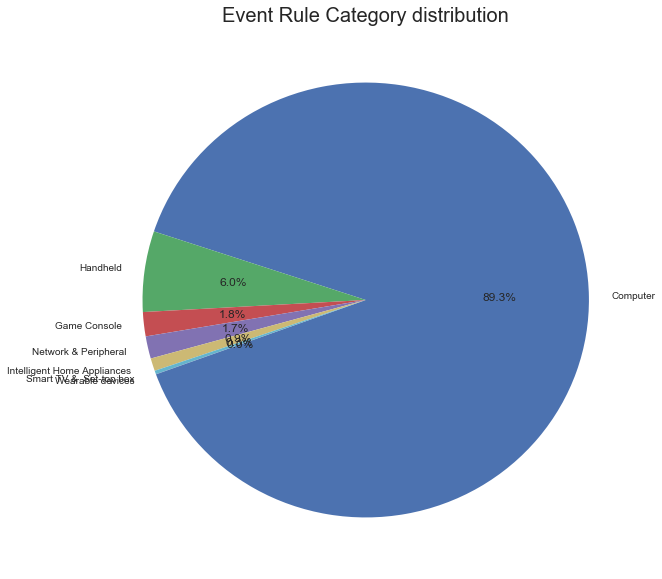

In [2]:

####################################
# 裝置名稱使用比例圖
####################################
print (Tbrain['device_family_name'].value_counts().reset_index()) # event_rule_reference: 可以去mapping 國網中心
plt.figure(figsize=(10,10))
temp_series = Tbrain['device_family_name'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Event Rule Category distribution", fontsize=20)
plt.show() # 


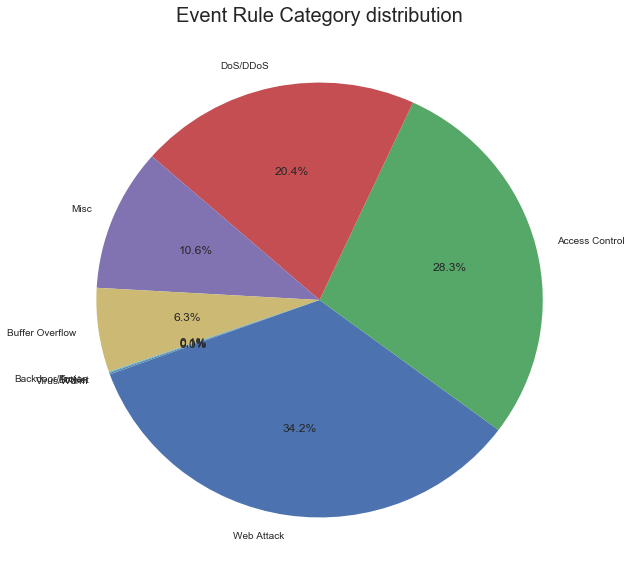

In [3]:
####################################
# 攻擊的種類比例圖
####################################
plt.figure(figsize=(10,10))
temp_series = Tbrain['event_rule_category'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Event Rule Category distribution", fontsize=20) # 發動攻擊的種類比例圖
plt.show()


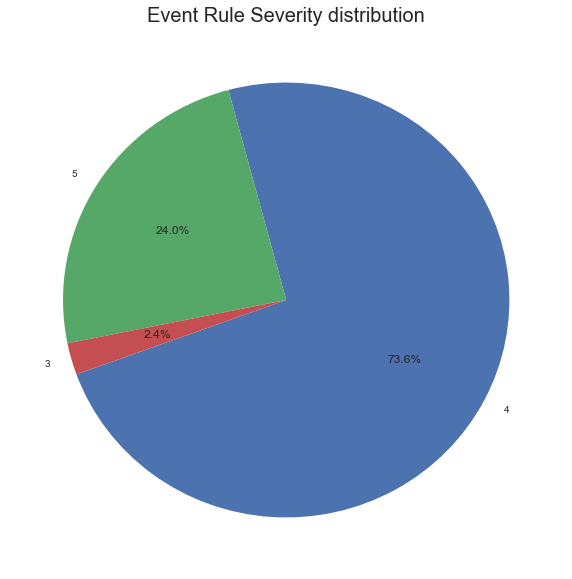

In [4]:
####################################
# 攻擊的嚴重程度分佈圖
####################################
plt.figure(figsize=(10,10))
temp_series = Tbrain['event_rule_severity'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Event Rule Severity distribution", fontsize=20) # 攻擊的嚴重程度分佈圖
plt.show()


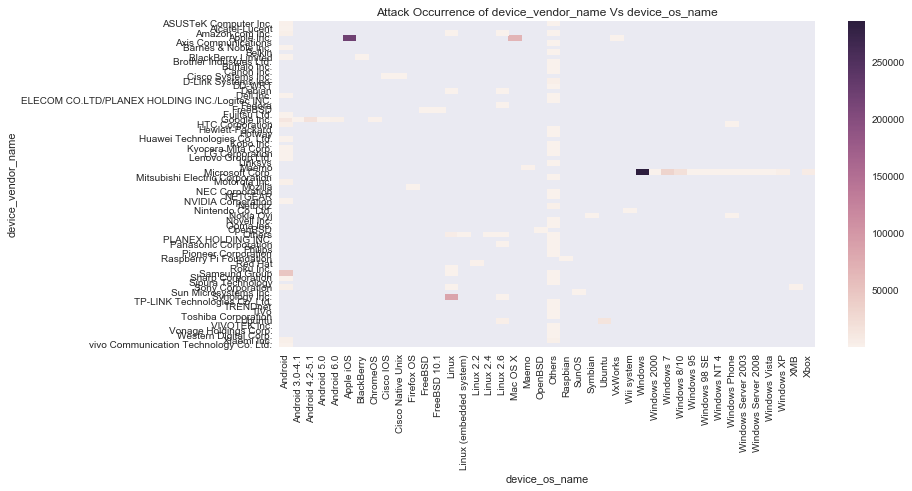

In [6]:

####################################
# 哪種裝置和哪種型別有攻擊發生的頻率最高
####################################
grouped_df = Tbrain.groupby(["device_vendor_name", "device_os_name"])["event_rule_category"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('device_vendor_name', 'device_os_name', 'event_rule_category')
grouped_df
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Attack Occurrence of device_vendor_name Vs device_os_name") # 裝置名字和裝置型別, 攻擊的發生頻率。
plt.show()
# To sum up, 
# 1.Looks like taht 裝置是電腦且型別是桌機被攻擊的次數相較於其他為最高.
# 2.再來就是手持的Android 裝置, 是第二種最容易發生攻擊的圖。


In [ ]:

####################################
# Future Work
####################################
# to Customer: 什麼device 在什麼時段, 最安全。#
# to Business: 預測在什麼event下, 可能是什麼category和severity 。
# device_vendor_name: 廠商名稱
# device_os_name: 作業系統
# 是最容易被攻擊的(inbound 和outbound)
